In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.utils import to_categorical

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
test_labels.shape

(10000,)

In [ ]:
plt.gray()

<Figure size 640x480 with 0 Axes>

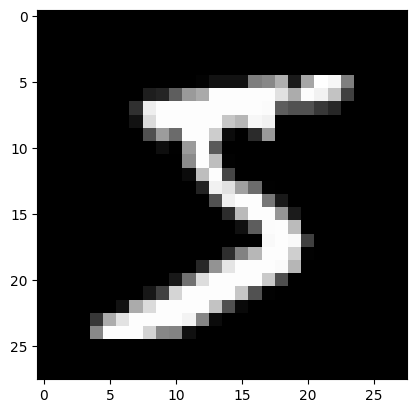

In [ ]:
plt.imshow(train_images[0])

In [ ]:
train_labels[0]

5

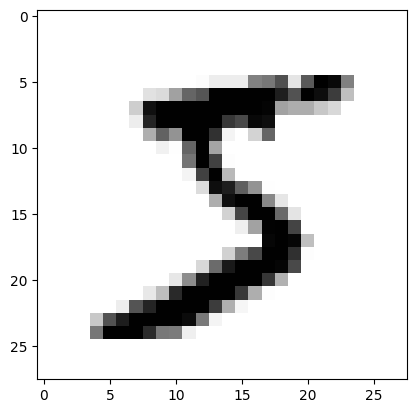

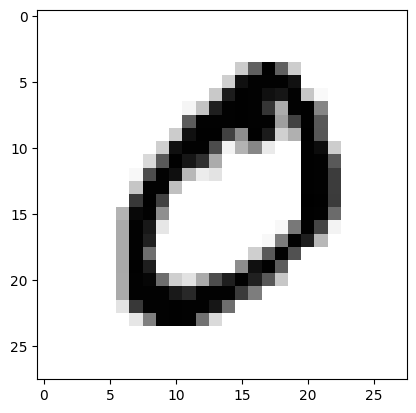

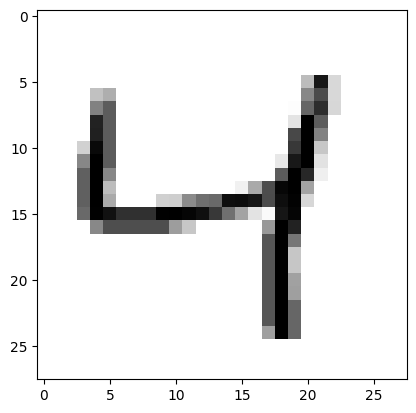

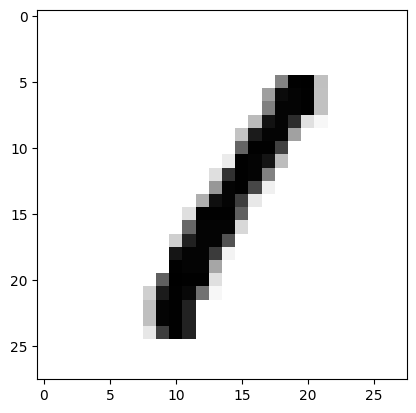

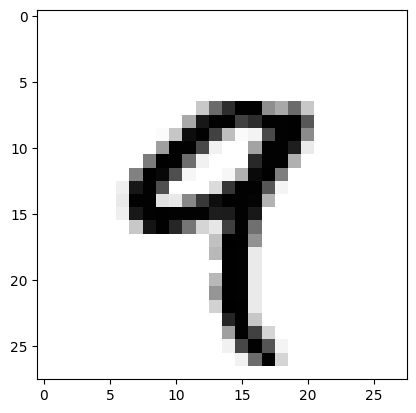

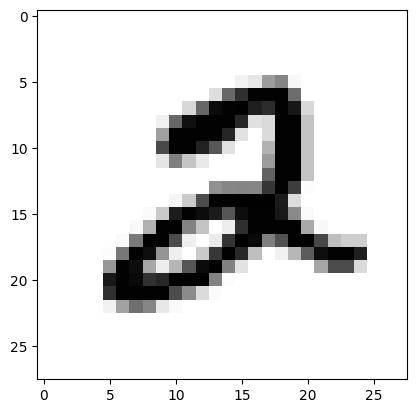

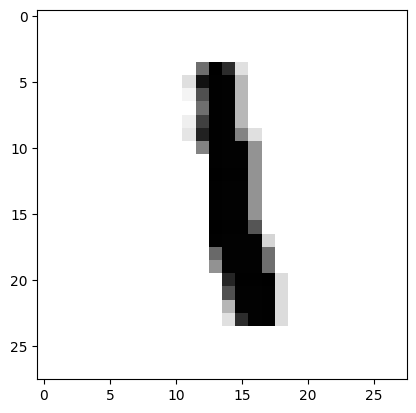

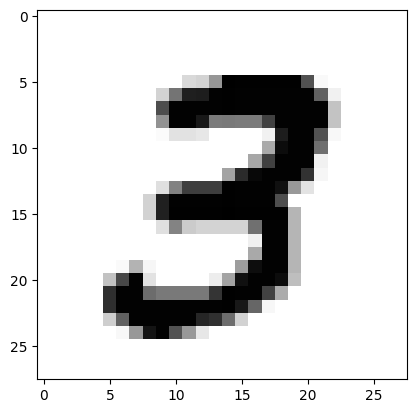

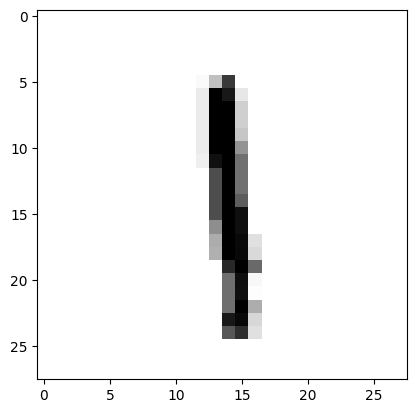

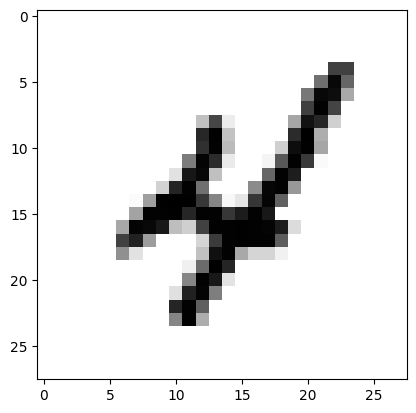

In [ ]:
for i in range(10):
    plt.imshow(train_images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

In [ ]:
model_cnn = models.Sequential()
model_cnn.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model_cnn.add(layers.MaxPooling2D(2,2))
model_cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model_cnn.add(layers.MaxPooling2D(2,2))
model_cnn.add(layers.Conv2D(64, (3,3), activation='relu'))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dropout(0.25))
model_cnn.add(layers.Dense(64, activation = 'relu'))
model_cnn.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
train_images_cnn = train_images.reshape(60000, 28, 28, 1)

In [ ]:
train_images_cnn.shape

(60000, 28, 28, 1)

In [ ]:
train_images_cnn = train_images_cnn.astype('float32') / 255
test_images_cnn = test_images.reshape(10000, 28, 28, 1)
test_images_cnn = test_images_cnn.astype('float32') / 255

In [ ]:
train_labels_cnn = to_categorical(train_labels)

In [ ]:
test_labels_cnn = to_categorical(test_labels)

In [ ]:
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model_cnn.fit(train_images_cnn, train_labels_cnn,batch_size=128,epochs=10,verbose=1,validation_data=(test_images_cnn, test_labels_cnn ))

Epoch 1/10
469/469 [==============================] - 63s 130ms/step - loss: 0.2654 - accuracy: 0.9190 - val_loss: 0.0525 - val_accuracy: 0.9842
Epoch 2/10
469/469 [==============================] - 60s 127ms/step - loss: 0.0657 - accuracy: 0.9794 - val_loss: 0.0379 - val_accuracy: 0.9884
Epoch 3/10
469/469 [==============================] - 59s 125ms/step - loss: 0.0492 - accuracy: 0.9843 - val_loss: 0.0365 - val_accuracy: 0.9880
Epoch 4/10
469/469 [==============================] - 60s 128ms/step - loss: 0.0391 - accuracy: 0.9876 - val_loss: 0.0263 - val_accuracy: 0.9906
Epoch 5/10
469/469 [==============================] - 59s 125ms/step - loss: 0.0333 - accuracy: 0.9894 - val_loss: 0.0258 - val_accuracy: 0.9923
Epoch 6/10
469/469 [==============================] - 60s 127ms/step - loss: 0.0280 - accuracy: 0.9907 - val_loss: 0.0246 - val_accuracy: 0.9916
Epoch 7/10
469/469 [==============================] - 59s 125ms/step - loss: 0.0254 - accuracy: 0.9922 - val_loss: 0.0273 - val_ac

In [ ]:
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(test_images_cnn, test_labels_cnn)

313/313 [==============================] - 3s 10ms/step - loss: 0.0243 - accuracy: 0.9931


In [ ]:
print('test accuracy:', (test_acc_cnn*100))

test accuracy: 99.30999875068665


In [ ]:
predictions=model_cnn.predict(test_images_cnn[0:100])

4/4 [==============================] - 0s 8ms/step


In [ ]:
predictions[0]

array([1.2761912e-10, 8.4469875e-08, 1.9182492e-06, 1.4151851e-06,
       1.3339208e-07, 2.5425506e-09, 4.1384750e-13, 9.9999624e-01,
       3.4301792e-08, 1.0340664e-07], dtype=float32)

In [ ]:
import numpy as np
np.argmax(predictions[0])


7

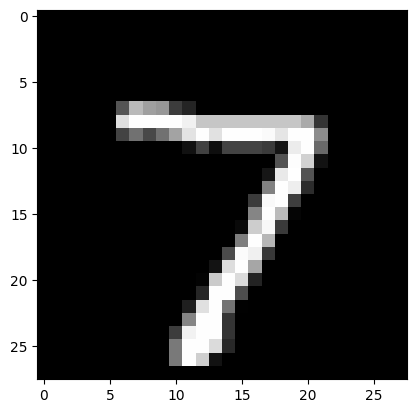

In [ ]:
plt.imshow(test_images_cnn[0].reshape(28,28))

In [ ]:
np.argmax(predictions,axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 5, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9])

In [ ]:
test_labels[0:100]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9], dtype=uint8)

In [ ]:
np.argmax(predictions,axis=1) ==test_labels[0:100]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
np.mean(np.argmax(predictions,axis=1) ==test_labels[0:100])

0.99

In [ ]:
wrong = np.argmin(np.argmax(predictions,axis=1) == test_labels[0:100])
print(wrong)

62


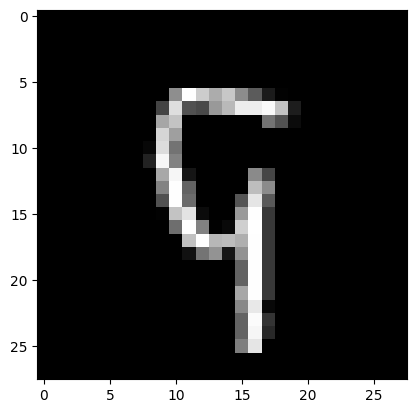

label for  62 : 9
prediction for it :  5


In [ ]:
plt.imshow(test_images_cnn[wrong].reshape(28,28))
plt.show()
print("label for ",wrong,":",test_labels[wrong])
print("prediction for it : ",np.argmax(predictions[wrong]))

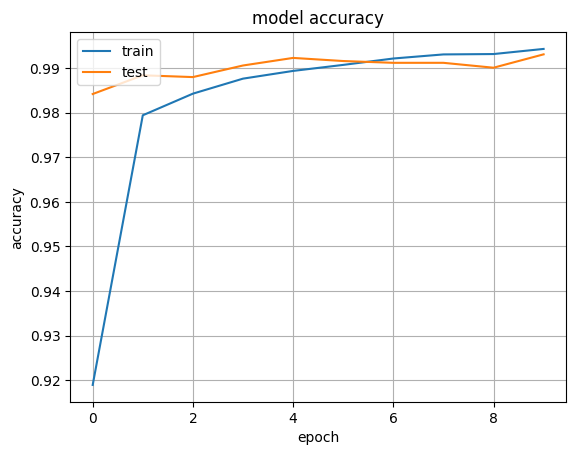

In [ ]:
from  matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

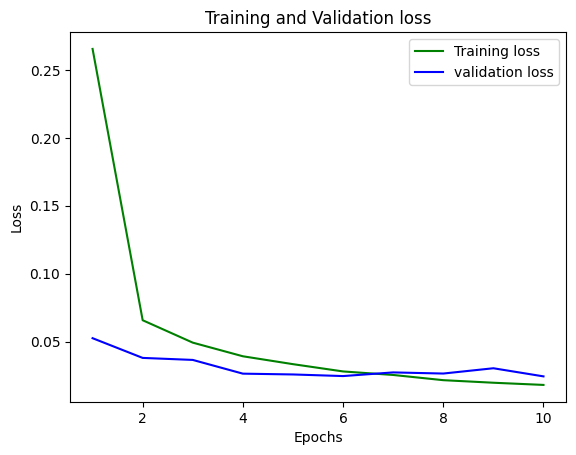

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()